# Isabelle Arseneau-Bruneau  
## A P-Hacking Analysis

## Requirements and Creating the Virtual Environment 

For this analysis, we assume that you have a Conda environment installed on your computer. (If this is not the case, go to https://docs.conda.io/projects/conda/en/latest/user-guide/install/ )
 
To facilitate the installation of the dependencies, a virtual environnement has been created so users can avoid troubles experienced on local machines by the author of this notebook). Thus, make sure to follow the installation instructions described here, on in the README.md document, or at the beginning of the jupyter notebook of this repository.

To Install and run the virtual environment, go to your terminal and enter the following commands:

`conda env create --file isabelle.yml`

`conda activate isabelle`

`jupyter notebook myAnalysis.ipynb`

For Python environment (numpy, scipy, matplotlib), you can refer to the installations instruction found here https://school.brainhackmtl.org/setup/, but the instructions mentioned above are made to replace these steps.   

Next, we need to importing the modules and librairy listed in the command below:

In [1]:
import pandas as pd #this means that pandas is called as "pd" to make shorter
import os
import random as rd
import numpy as np #numpy is called as "np" to make shorter
import matplotlib.pyplot as plt #pyplot is called as "plt" to make shorter
from scipy import stats #as sst sometimes (statsmodels)* 
from statsmodels.formula.api import ols
from pandas import plotting as pdplt

## ACKNOWLEDGEMENT: 
This notebook is based on J.-B. Poline's Jupyter Notebook "Intro-to-stat" presented during the Brainhack School 2020, Introduction to Statistics Lecture, Montreal, May 14th 2020

## Statistical Analysis Procedures

As a research question, we are interested to see if the number of social conflicts experienced by participants during a segment of the COVID confinement (y-variable 'partY') may have been influenced by several factors, such as the participant's Gender, their Verbal IQ, their brain volume (MRI_Count), or their alchool intake during the corresponding period (y-variable 'partY2'). 

__'partY'__ is measured as the number of conflicts reported during the 6th week of the COVID confinement\
__'partY2'__ is measured as the number of standard alchool intake (as defined by Educalcool, for details see reference below) reported by participants for the period covering the 6th week of the COVID confinement

(Éduc’alcool (Association). (2007). Alcool et santé: Les niveaux de consommation d’alcool à faible risque, 2-3-4-5-0. Éduc’Alcool.)

Statistical analysis where conducted on "My-super-Macbook-Pro-that-fits-in-an-envoloppe" with the software packages described above in the "Requirements" section. 

In [2]:
#First, load the file containing the brain images: brainsize.csv

csvfile = ('./data/brainsize.csv')

data = pd.read_csv(csvfile,sep=';', index_col=0) 
#Create pandas dataframe for the brainsize csv file and named this data "data"
#(sep indicate the separation in the dataframe, index_col=0 
#indicates what header's index column to refer when manipulating the data)
#(If you remove "index_col=0" you will have another column preceeding the first
#column that will identify the first rows as 0, 1, 2, 3, etc.) 

data.head() #Prints the headers of the file called "data"

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118,64.5,816932
2,Male,140,150,124,.,72.5,1001121
3,Male,139,123,150,143,73.3,1038437
4,Male,133,129,128,172,68.8,965353
5,Female,137,132,134,147,65.0,951545


Notice that there is a dot ('.') in weight of the second subject, indicating incomplete data. \
This will cause problems, so we will need to replace "." values with NaN to further conduct the analysis

In [3]:
#We will use the command
#data = pandas.read_csv(csvfile, sep=';', na_values=".") with pandas as pd

data = pd.read_csv(csvfile, sep=';', na_values=".")
data.head(3) #this new dataframe uses na and drop "." 
# you can also drop subjects having NaN data with the command $data.dropna().head(3)
# But this may reduce your dataset considerably (there are other alternative to that)

#(Notice the added column at the beginning as we did not specify the index column)

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437


Let's examine the file "data" (e.g., shape, number of columns, rows, etc.)

In [4]:
print('data.shape: ', data.shape) #Will indicate (number of rows, number of columns)
print('data.columns: ', data.columns)  #Will indicate what each column header is 

data.describe()
#This will provide an output that summarize each variable
#E.g. It will be useful for us to know the Dataframe number of rows for the partY and partY2 variables

data.shape:  (40, 8)
data.columns:  Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')


,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


## Adding New Variables of Random Numbers (Noise) to our Dataframe
Now, we will add two colums to the file brainsize.csv (the dataframe we called data).\

We first need to insert a new variable (of random noise) called "partY" that represents the number of social conflicts participants reported experiencing during the 6th week of the COVID-19 confinement. (Our AMAZING innovative methods have\ demonstrated that our random noise generator is the greatest procedure to obtain this data, see Assign Ments Needs et al., 2020) 

__Careful here__, you will need to use a __random seed__ in order to "fix" the random values obtained from the random number generator so that we don't have a different set of numbers every time your run your command. This will be done by calling the number of a specific random seed when using the number generator.  

If you are generating random noise (random values) for more than one variable, __different random seed__ will be needed in order to have different values (e.g. for your "partY and "partY2" arrays). 

For more information, see https://pynative.com/python-random-seed/

In [5]:
#We will use the following structure to add our columns arays  
#partY_values = []
#for i in range(num_rows): 
#    i = rd.randint(0,32) #here range (min, max)
#    partY_values.append(i)

#import random as rd #This import a random number generator module
rd.seed(2) #This will fix the number generator to the random seed no 2 

partY_values = [] #This is creating a new array called "partY" 
for i in range(40): #This is creating a loop for the 40 rows of the new array
    i = rd.randint(0,32) # a random number is assigned for each row (i)
    partY_values.append(i)#partY_values is now full with random values between 0 and 32

#Now, we need to create new column in data (our dataframe) and assign partY-values to it
data['partY'] = partY_values
#print(partY_values.append(i)) can allow you to verify

data.head() #More visually appealing command, (40) give full frame instead of 6 rows

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY
0,1,Female,133,132,124,118.0,64.5,816932,3
1,2,Male,140,150,124,NaN,72.5,1001121,5
2,3,Male,139,123,150,143.0,73.3,1038437,5
3,4,Male,133,129,128,172.0,68.8,965353,23
4,5,Female,137,132,134,147.0,65.0,951545,10


Now, we will add the other new variable, "partY2" that represents the number of 
alcohol intake of participants during the 6th week of the COVID-19 confinement. 

In [6]:
#Using the same structure as above but with a different random seed: 

rd.seed(26) #This a different random seed which "fix" the random values generated

partY2_values = [] #Creates new array called "partY2" 
for i in range(40): #Createsa loop for the 40 rows of array "partY2"
    i = rd.randint(0,32) #random number assigned for each row (i)
    partY2_values.append(i)#partY2_values now filed with random values between 0 and 32

#To create this new column in data (our dataframe) and assign partY2-values to it
data['partY2'] = partY2_values
#print(partY2_values.append(i)) can allow you to verify

data.head() #Verify the resulting dataframe

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY,partY2
0,1,Female,133,132,124,118.0,64.5,816932,3,12
1,2,Male,140,150,124,NaN,72.5,1001121,5,13
2,3,Male,139,123,150,143.0,73.3,1038437,5,27
3,4,Male,133,129,128,172.0,68.8,965353,23,3
4,5,Female,137,132,134,147.0,65.0,951545,10,8


### Verifying Data Types

In [7]:
#Now that we have our full dataframe, let's check each data types
data.dtypes

Unnamed: 0      int64
Gender         object
FSIQ            int64
VIQ             int64
PIQ             int64
Weight        float64
Height        float64
MRI_Count       int64
partY           int64
partY2          int64
dtype: object

We are confirming that each variable seem to fit with the right data type (e.g. gender are object, scores are intergers, etc.) 

### Data Screening
Because we aim to be "the worlds'greatest researchers", we will only consider subjects that \
have complete data and drop the missing data. _(This is one of our p-hacking strategies)_ 

_(It is too bad here that the researchers in question did not watch the Intro-to-stats lecture \
of the BHS2020. They would have known that this operation reduce their sample size, which affect 
their Degree of freedom and results.)_

In [8]:
data.dropna() #This will remove the subjects with incomplete data and provide and output of the dataframe

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY,partY2
0,1,Female,133,132,124,118.0,64.5,816932,3,12
2,3,Male,139,123,150,143.0,73.3,1038437,5,27
3,4,Male,133,129,128,172.0,68.8,965353,23,3
4,5,Female,137,132,134,147.0,65.0,951545,10,8
5,6,Female,99,90,110,146.0,69.0,928799,19,30
6,7,Female,138,136,131,138.0,64.5,991305,16,2
7,8,Female,92,90,98,175.0,66.0,854258,13,32
8,9,Male,89,93,84,134.0,66.3,904858,2,10
9,10,Male,133,114,147,172.0,68.8,955466,10,27
10,11,Female,132,129,124,118.0,64.5,833868,27,15


## Descriptives Statististics
Now, Let'S explore this dataframe and examine descriptive statistics, such as the means of our variable of interest 'partY' \
as a function of the gender of the participants.

In [9]:
print('data.shape: ', data.shape) #Will indicate (number of rows, number of columns)
print('data.columns: ', data.columns)  #Will indicate what each column header is 
print('\nFemale partY mean: ', data[data['Gender'] == 'Female']['partY'].mean())
print('\nMale partY mean: ', data[data['Gender'] == 'Male']['partY'].mean())

#Example of command to get the mean of a group associated with a category variable
#e.g. here the mean of the partY, selecting only the female subjects, and then only the male subjects

data.describe()
#This will provide an output that summarize each variable  

data.shape:  (40, 10)
data.columns:  Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count', 'partY', 'partY2'],
      dtype='object')

Female partY mean:  16.8

Male partY mean:  18.25


,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY,partY2
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01,40.000000,40.000000
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05,17.525000,15.800000
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04,10.010219,10.168327
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05,1.000000,0.000000
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05,10.000000,8.000000
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05,18.000000,14.500000
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05,26.250000,26.250000
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06,32.000000,32.000000


This is encouraging, in absolute numbers, the males of the sample reported a greater average of social conflicts ('partY') during the 6th week of confinement than their female conterparts. However, we don't know if this difference is signficant yet. 

Let's check the means by gender for Verbal IQ 'VIQ", alchool intake 'partY2', and for 'MRI_Count' (that we associate here with brain volume for the need of the cause).

In [10]:
#For our research question, group by gender (check lecture 23:43)
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [11]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['partY2']:
    print((gender, value.mean()))

('Female', 14.4)
('Male', 17.2)


In [12]:
 groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['MRI_Count']:
    print((gender, value.mean()))

('Female', 862654.6)
('Male', 954855.4)


In [13]:
groupby_gender.mean() #This is another way to display this descriptive data in a table

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY,partY2
Gender,,,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6,16.80,14.4
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4,18.25,17.2


Let's also examine the distribution of these variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000835C8CA88>,
      dtype=object)

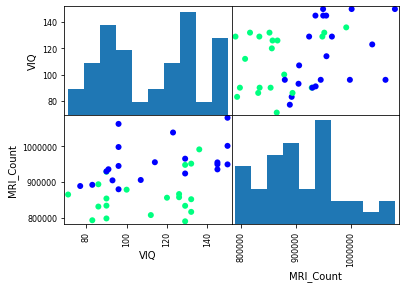

In [14]:
#from pandas import plotting as pdplt

pdplt.scatter_matrix(data[['VIQ', 'MRI_Count', ]], c=(data['Gender'] == 'Female'), marker='o', alpha=1, cmap='winter')
#we first assigned scatterplots with different colors for each genders, with marker shape o

#fig = pdplt.gcf()
#fig.subtitle('blue: male, green: female', size=40)
#pdplt.show()

Let's also observe the distributions of 'partY' and 'partY2', as well as their relations to each other

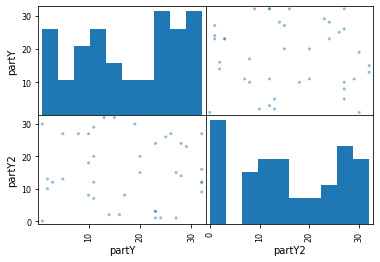

In [15]:
pdplt.scatter_matrix(data[['partY', 'partY2']]);

## T-Tests

Let's now observe if the differences observed in the descriptive stastistics are actually significant 

In [16]:
from scipy import stats

female_viq = data[data['Gender'] == 'Female']['VIQ'] #Select female scores of VIQ
male_viq = data[data['Gender'] == 'Male']['VIQ']  #Select male scores of VIQ
stats.ttest_ind(female_viq, male_viq) #Run independent sample t-test

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

In [17]:
female_MRI_Count = data[data['Gender'] == 'Female']['MRI_Count']
male_MRI_Count = data[data['Gender'] == 'Male']['MRI_Count']
stats.ttest_ind(female_MRI_Count, male_MRI_Count)

Ttest_indResult(statistic=-5.215594290396395, pvalue=6.757994867071175e-06)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000083629CAC8>,
      dtype=object)

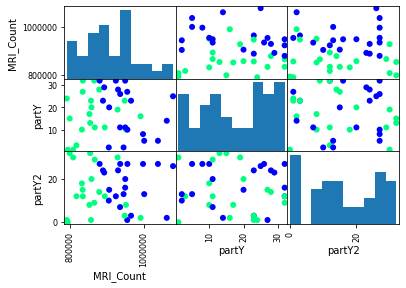

In [18]:
pdplt.scatter_matrix(data[['MRI_Count', 'partY', 'partY2']], c=(data['Gender'] == 'Female'), marker='o', alpha=1, cmap='winter')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000083659F8C8>,
      dtype=object)

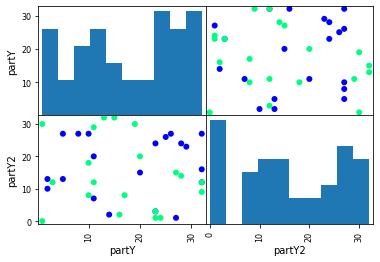

In [19]:
pdplt.scatter_matrix(data[['partY', 'partY2']], c=(data['Gender'] == 'Female'), marker='o', alpha=1, cmap='winter')

In [20]:
female_partY = data[data['Gender'] == 'Female']['partY']
male_partY = data[data['Gender'] == 'Male']['partY']
stats.ttest_ind(female_partY, male_partY)

Ttest_indResult(statistic=-0.45337265627602474, pvalue=0.6528588899976295)

In [21]:
female_partY2 = data[data['Gender'] == 'Female']['partY2']
male_partY2 = data[data['Gender'] == 'Male']['partY2']
stats.ttest_ind(female_partY2, male_partY2)

Ttest_indResult(statistic=-0.868023528325037, pvalue=0.39083044414047874)

Let'S group our variable of interest in Box plots

{'Female': Int64Index([0, 4, 5, 6, 7, 10, 13, 14, 15, 16, 18, 22, 24, 26, 28, 29, 30, 34,
             35, 37],
            dtype='int64'),
 'Male': Int64Index([1, 2, 3, 8, 9, 11, 12, 17, 19, 20, 21, 23, 25, 27, 31, 32, 33, 36,
             38, 39],
            dtype='int64')}

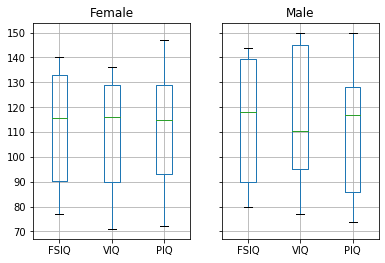

In [22]:
# Box plots of different columns for each gender
groupby_gender.boxplot(column=['FSIQ', 'VIQ', 'PIQ']) #(Note p-hacking here, FSIQ and PIQ never mentionned)
groupby_gender.groups


{'Female': Int64Index([0, 4, 5, 6, 7, 10, 13, 14, 15, 16, 18, 22, 24, 26, 28, 29, 30, 34,
             35, 37],
            dtype='int64'),
 'Male': Int64Index([1, 2, 3, 8, 9, 11, 12, 17, 19, 20, 21, 23, 25, 27, 31, 32, 33, 36,
             38, 39],
            dtype='int64')}

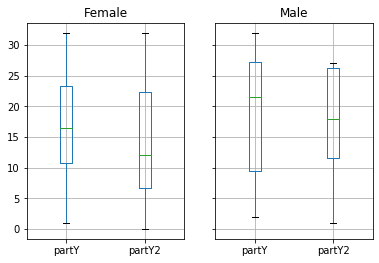

In [23]:
# Box plots of different columns for each gender
groupby_gender.boxplot(column=['partY', 'partY2'])
groupby_gender.groups


## T-Test Results
Male and female did not significantly differ in the numbers of social conficts that they reported experiencing during the 6th week of the covid confinement and in their alchool intake during this same period. However, we found that brain volume differ with very high significance as a function of gender (independent-sample t-test(38)=-5.22, p-value<0.0001) in these subjects.   

## Ordinary Least Square Models

In [24]:
from statsmodels.formula.api import ols

model = ols('partY ~ Gender + MRI_Count + VIQ', data).fit()
print(model.summary()) #We want to see if the number of social conflicts 'partY' could vary as a function of gender
                        # with interaction with the brain size and verbal IQ 

# Here, we don't need to define a contrast, as we are testing a single
# coefficient of our model, and not a combination of coefficients.

# However, defining a contrast, which would then be a 'unit contrast',
# will give us the same results
print(model.f_test([0, 1, 0, 0]))

                            OLS Regression Results                            
Dep. Variable:                  partY   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.069
Method:                 Least Squares   F-statistic:                    0.1639
Date:                Mon, 01 Jun 2020   Prob (F-statistic):              0.920
Time:                        04:06:12   Log-Likelihood:                -148.12
No. Observations:                  40   AIC:                             304.2
Df Residuals:                      36   BIC:                             311.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         30.8688     26.033      1.

In [25]:
#We are using the same structure as above but the amount of alchool intake 'partY2' is our variable of interest
model = ols('partY2 ~ Gender + MRI_Count + VIQ', data).fit()
print(model.summary())

print(model.f_test([0, 1, 0, 0]))

                            OLS Regression Results                            
Dep. Variable:                 partY2   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     1.460
Date:                Mon, 01 Jun 2020   Prob (F-statistic):              0.242
Time:                        04:06:12   Log-Likelihood:                -146.73
No. Observations:                  40   AIC:                             301.5
Df Residuals:                      36   BIC:                             308.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         33.0062     25.139      1.

In [26]:
#We are using the same structure as above but the amount of alchool intake 'partY2' is our variable of interest
model = ols('partY2 ~ Gender + VIQ + partY', data).fit()
print(model.summary())

print(model.f_test([0, 1, 0, 0]))

                            OLS Regression Results                            
Dep. Variable:                 partY2   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     1.535
Date:                Mon, 01 Jun 2020   Prob (F-statistic):              0.222
Time:                        04:06:12   Log-Likelihood:                -146.62
No. Observations:                  40   AIC:                             301.2
Df Residuals:                      36   BIC:                             308.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         29.9193      8.311      3.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000836C43D88>,
      dtype=object)

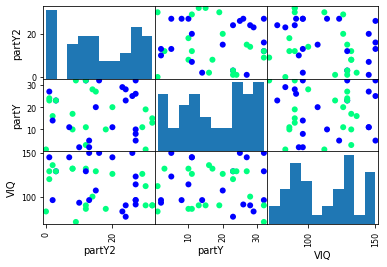

In [27]:
pdplt.scatter_matrix(data[['partY2', 'partY', 'VIQ']], c=(data['Gender'] == 'Female'), marker='o', alpha=1, cmap='winter')

## Ordinary Least Square Regression Results

The results suggest an interaction ([intercept] t=3.6, p= .001) for the alchool intake and gender, in relation to Verbal IQ and the number of social conflicts reported by participants during the 6th week of the covid confinment ('partY2'). Males and females may modify their alchol intake in light of this finding.  
 
_(What the p-hacker would not report, is that we failed to find a significant interraction of the gender and the amount of social conflicts 'partY' experienced during the COVID confinement when examine in relation to the brain volume or the verbal IQ. We also failed to find a significant interraction of the gender and the amount of alchool intake 'partY2' during the COVID confinement when examine in relation to the brain volume or the verbal IQ. The list of various tests performed above would also not be mentioned. This finding was the only one founds after more then 20 statistical operations.The two males participants screened out of the analysis because of incmomplete data, an the relative small sample size for male and female would also not be mentioned by p-hackers)_


## Conclusion

As some requirements are met for p-hacking, we conclude that the current findings may not suffice to influence alchool intake in males and females during the COVID 19 confinement. Drink with fun and moderation!